## Grouping Objects by similarity using k-means
* __k-means__ clustering belongs to the category of __prototype-based clustering.__
* __Prototype-based clustering__ means that each cluster is represented by a prototype, which can either be the __centroid (average)__ of similar points with continuous features, or the __medoid (the most representative or most frequently occurring point)__ in the case of categorical features.
* Easy to implement as well as computationally very efficient as compared to other clustering algorithms.
* We have to specify the number of clusters k a priori.
* An inappropriate choice for k can result in poor clustering performance.

In [40]:
'''function to save image'''
def saveimg(name='fig'):
    if not os.path.exists(os.path.join(os.getcwd(), 'figures')):
        os.mkdir('figures')
    plt.savefig('./figures/%s.png'% name, dpi=120)

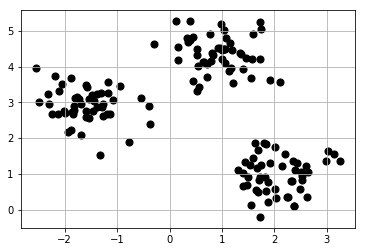

In [41]:
'''
Learning by doing
'''
import os
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
           X[:, 1],
           c='black',
           marker='o',
           s=50)
plt.grid()
plt.show()
# save('dataset')
plt.gcf().clear()

In [34]:
'''apply k-means algorithm to our dataset'''
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

## Shortcomings of K-means
1. the classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. Methods to solve this are: _run kmeans multiple times and select the best performing model in terms of SSE._ __OR__ _place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results._

2. Another problem with k-means is that one or more clusters can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means.

In [35]:
'''implementing k-means++'''
km_plus2 = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km_plus2 = km.fit_predict(X)

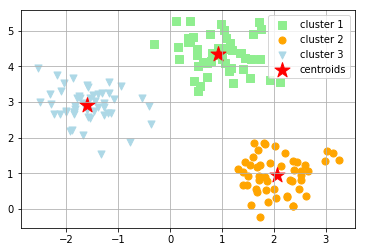

In [39]:
'''visualize the clusters that k-means identified'''
plt.scatter(X[y_km==0, 0],
           X[y_km==0, 1],
           s=50,
           c='lightgreen',
           marker='s',
           label='cluster 1')

plt.scatter(X[y_km==1, 0],
           X[y_km==1, 1],
           s=50,
           c='orange',
           marker='o',
           label='cluster 2')

plt.scatter(X[y_km==2, 0],
           X[y_km==2, 1],
           s=50,
           c='lightblue',
           marker='v',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c='red',
            s=250,
            marker='*',
            label='centroids')

plt.legend()
plt.grid()
# plt.show()
saveimg('k_means_plot')
plt.gcf().clear()